In [2]:
import pandas as pd  
import numpy as np  
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline



In [3]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [4]:
#df['Diag'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      64 non-null     object 
 1   P100    64 non-null     float64
 2   P41     64 non-null     float64
 3   OspC    64 non-null     float64
 4   DbpA    64 non-null     float64
 5   BmpA    64 non-null     float64
 6   DbpB    64 non-null     float64
 7   P45     64 non-null     float64
 8   P58     64 non-null     float64
 9   P66     64 non-null     float64
 10  VlsE    64 non-null     float64
 11  ErpL    64 non-null     float64
 12  OspD    64 non-null     float64
 13  Diag    64 non-null     object 
dtypes: float64(12), object(2)
memory usage: 7.1+ KB


In [5]:
df.columns
#df.dtypes

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
#X = df.drop(['Diag','ID'], axis=1)  
#X = df.filter(['VlsE', 'DbpA', 'P58', 'OspC','ErpL','DbpB'],axis=1) 
X = df.filter(['VlsE', 'DbpA', 'P58', 'OspC','ErpL','P66'],axis=1) 

#Data Standardization gives the data zero mean and unit variance, it is considered good practice, 
#especially for algorithms such as KNN which is based on the distance of data points
#however, there is some disagreement about it for logistic regression...may require testing for specific dataset 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
y = df['Diag']
#split original dataset into training and testing subsets
#stratify=y ensures that the sampled sets attempt to represent each class's proportions as they were in the full set
#the 'y' does not mean 'yes' it is the y vectors of class labels
#note, random_state provides specific seed for pseudorandom generator to allow reproducible analysis of the model
#remove this parameter to allow random selection each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#the hyperparameters being fed to the gridsearch in this case may include some that are not 
#applicable with each other. Invocations with those may raise warnings that should be able to be ignored
#but to the degree practicable, feed compatible parameters together...

#we define the set of parameter values that will be passed in as "param_grid"
#max_iter is set very high due to non convergence errors that had been occurring. This can be revisited as data set 
#continues to grow
param_grid = [{'C': [.1,1,2.5,5], 'penalty': ['none','l2'],'solver': ['lbfgs','newton-cg', 'sag'], 'max_iter':[5000]},             
             {'C': [.1,1,2.5,5], 'penalty': ['none','l1','l2','elasticnet'],'solver': ['saga'], 'max_iter':[5000]}]
#following set left out as liblinear does not support multinomial classification. Reserve for binary pos/neg analysis
#{'C': [.1,1,2.5,5], 'penalty': ['l1','l2'],'solver': ['liblinear'], 'max_iter':[2000]},

logreg=LogisticRegression(multi_class='multinomial')
#this code implements the grid search
grid = GridSearchCV(logreg,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...C=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.1, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212

[CV] END .....C=0.1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=5000, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_i

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=1, max_iter=5000, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=1, max_i

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=2.5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=2.5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=2.5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ...C=2.5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=2.5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=2.5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=2.5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=2.5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=2.5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=2.5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .....C=2.5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212

[CV] END .....C=2.5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=2.5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=2.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=2.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=2.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=2.5, max_i

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .C=5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .C=5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=5, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .......C=5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212

[CV] END .......C=5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, max_iter=5000, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=5, max_iter=5000, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=5, max_i

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ....C=0.1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ....C=0.1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=0.1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ....C=0.1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=500

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

[CV] END ......C=1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ......C=1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=1, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, max_it

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

[CV] END ....C=2.5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ....C=2.5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ....C=2.5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ....C=2.5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=2.5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=2.5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=2.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=2.5, max_iter=5

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

[CV] END ......C=5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ......C=5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=5, max_iter=5000, penalty=none, solver=saga; total time=   0.1s
[CV] END ........C=5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=5, max_iter=5000, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=5, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, max_iter=5000,

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial'),
             param_grid=[{'C': [0.1, 1, 2.5, 5], 'max_iter': [5000],
                          'penalty': ['none', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'C': [0.1, 1, 2.5, 5], 'max_iter': [5000],
                          'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                          'solver': ['saga']}],
             verbose=2)

In [8]:
#print(grid.best_estimator_.penalty)

In [9]:
#from sklearn.model_selection import cross_val_score
print(grid.best_estimator_.get_params())



{'C': 5, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [10]:
model = grid.best_estimator_
#following lines are not needed as gridsearchCV does 'refit' (retrains best estimator on full set provided[the whole
#training set in this case]) by default
#model.set_params(max_iter=5000)
#model.fit(X_train, y_train)

yhat = model.predict(X_test)
print('Predicted Classes:')
print(yhat)
print('Actual Classes:')
print(y_test)

score = model.score(X_test,y_test)
# report the model performance
print('Accuracy: %.3f ' % (score))

Predicted Classes:
['Pos - Early Acute' 'Pos - Early Conv' 'Neg' 'Pos - Late' 'Neg' 'Neg'
 'Neg' 'Pos - Early Acute' 'Pos - Early Conv' 'Neg' 'Pos - Early Acute'
 'Neg' 'Pos - Early Acute' 'Neg' 'Pos - Early Acute' 'Neg']
Actual Classes:
26                  Neg
45     Pos - Early Conv
54                  Neg
1            Pos - Late
31                  Neg
18                  Neg
19                  Neg
33           Pos - Late
4      Pos - Early Conv
36    Pos - Early Acute
42     Pos - Early Conv
62                  Neg
7     Pos - Early Acute
22                  Neg
41    Pos - Early Acute
30                  Neg
Name: Diag, dtype: object
Accuracy: 0.750 


In [52]:
# predict probabilities with a multinomial logistic regression model
from sklearn.datasets import make_classification
# predict a multinomial probability distribution
yprobs = model.predict_proba(X_test)
# summarize the predicted probabilities
print('Predicted Probabilities:')
print(yprobs)
print(y_test.index)



Predicted Probabilities:
[[1.45e-01 6.87e-01 1.66e-01 1.44e-03]
 [8.00e-03 3.05e-01 5.63e-01 1.24e-01]
 [8.86e-01 4.91e-02 4.84e-02 1.64e-02]
 [2.02e-11 7.30e-10 3.58e-07 1.00e+00]
 [9.68e-01 2.02e-02 1.17e-02 4.11e-04]
 [9.53e-01 2.89e-02 1.85e-02 1.44e-04]
 [5.22e-01 2.57e-02 2.10e-01 2.42e-01]
 [4.17e-03 5.00e-01 4.90e-01 5.75e-03]
 [1.92e-06 5.56e-03 6.07e-01 3.87e-01]
 [5.91e-01 2.98e-01 1.10e-01 3.84e-04]
 [3.53e-01 5.15e-01 1.31e-01 2.46e-04]
 [9.72e-01 2.07e-02 7.46e-03 3.53e-05]
 [7.35e-03 7.62e-01 2.29e-01 1.28e-03]
 [9.01e-01 6.98e-02 2.91e-02 2.81e-04]
 [1.19e-01 6.25e-01 2.54e-01 1.72e-03]
 [8.10e-01 1.09e-01 8.00e-02 9.93e-04]]
Int64Index([26, 45, 54, 1, 31, 18, 19, 33, 4, 36, 42, 62, 7, 22, 41, 30], dtype='int64')


In [28]:
classes = ['neg','pos-early-acute','pos-early-conv','pos-late']
#print(type(classes))
#print(len(classes))
print(classes)

['neg', 'pos-early-acute', 'pos-early-conv', 'pos-late']


In [75]:
#following is test code to output the probabilities in an easy to 
#read format using the dataframe display and format options
import pandas as pd
def format_probabilities(prob_array, col_labels, sample_indices):
    if yprobs.shape[1] == len(classes):
        prob_df = pd.DataFrame(prob_array, columns=col_labels)
        prob_df['original sample index'] = sample_indices
        pd.set_option('display.float_format', lambda x: '%.3f' % x)
        pd.set_option('display.precision', 3)
        display(prob_df)
    else:
        print('Incorrect label list length')
        
classes = ['Negative','PosEarlyAcute','PosEarlyConv','PosLate']   
rows = y_test.index
print("Probabilities:")
format_probabilities(yprobs , classes, rows)

    

Probabilities:


,Negative,PosEarlyAcute,PosEarlyConv,PosLate,original sample index
0,0.145,0.687,0.166,0.001,26
1,0.008,0.305,0.563,0.124,45
2,0.886,0.049,0.048,0.016,54
3,0.000,0.000,0.000,1.000,1
4,0.968,0.020,0.012,0.000,31
5,0.953,0.029,0.018,0.000,18
6,0.522,0.026,0.210,0.242,19
7,0.004,0.500,0.490,0.006,33
8,0.000,0.006,0.607,0.387,4
9,0.591,0.298,0.110,0.000,36


In [76]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
import itertools

#code from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

                   precision    recall  f1-score   support

              Neg       0.88      0.88      0.88         8
Pos - Early Acute       0.40      0.67      0.50         3
 Pos - Early Conv       1.00      0.67      0.80         3
       Pos - Late       1.00      0.50      0.67         2

         accuracy                           0.75        16
        macro avg       0.82      0.68      0.71        16
     weighted avg       0.82      0.75      0.76        16

Confusion matrix, without normalization
[[7 1 0 0]
 [1 2 0 0]
 [0 1 2 0]
 [0 1 0 1]]


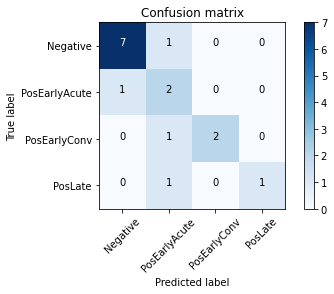

In [77]:
# Compute confusion matrix
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate'],normalize= False,  title='Confusion matrix')


In [82]:
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0
count = 100
classes=['Negative','PosEarlyAcute','PosEarlyConv','PosLate']
new_model = LogisticRegression(multi_class='multinomial', penalty=model.penalty, C=model.C, solver=model.solver, max_iter=model.max_iter)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y)   
    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    cnf_matrix = confusion_matrix(y_te, yh)
    yps = new_model.predict_proba(X_te)
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    #the code below derives TP/FP/TN/FN values from the multiclass confusion matrix by ignoring 
    #misclassification of positive subclasses   
    curr_false_pos = cnf_matrix.sum(axis=1)[0]-cnf_matrix[0][0]
    curr_false_neg = cnf_matrix.sum(axis=0)[0]-cnf_matrix[0][0]
    curr_true_neg = cnf_matrix[0][0]
    curr_true_pos = cnf_matrix.sum()-(curr_false_pos+curr_false_neg+curr_true_neg)    
        
    curr_sensitivity = curr_true_pos/(curr_true_pos+curr_false_neg)
    
    curr_specificity = cr["Neg"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    #rows = y_te.index
    #format_probabilities(yps , classes, rows)
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy
    

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count
print('')
print('Average Results:')
print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))

Run: 1
 Accuracy: 0.812 
 Sensitivity: 0.750 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 2
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 3
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 4
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 0.714 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 5
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 6
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 7
 Accuracy: 0.688 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 8
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 9
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 10
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 11
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 12
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 13
 Accuracy: 0.625 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 14
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 15
 Accuracy: 0.562 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 16
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 17
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 18
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 19
 Accuracy: 0.625 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 20
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 21
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 22
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 23
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 24
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 25
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 26
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 27
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 28
 Accuracy: 0.562 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 29
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 30
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 0.857 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 31
 Accuracy: 0.562 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 32
 Accuracy: 0.812 
 Sensitivity: 0.889 
 Specificity: 0.857 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 33
 Accuracy: 0.500 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 34
 Accuracy: 0.688 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 35
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 36
 Accuracy: 0.562 
 Sensitivity: 0.875 
 Specificity: 0.750 
Run: 37
 Accuracy: 0.812 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 38
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 39
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 40
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 41
 Accuracy: 0.625 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 42
 Accuracy: 0.688 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 43
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 0.875 
Run: 44
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 45
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 46
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 47
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 48
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 49
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 50
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 51
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 52
 Accuracy: 0.812 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 53
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 54
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 55
 Accuracy: 0.812 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 56
 Accuracy: 0.688 
 Sensitivity: 0.889 
 

C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 60
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 61
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 62
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 63
 Accuracy: 0.562 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 64
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 65
 Accuracy: 0.688 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 66
 Accuracy: 0.625 
 Sensitivity: 0.625 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 67
 Accuracy: 0.688 
 Sensitivity: 0.750 
 Specificity: 1.000 
Run: 68
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 69
 Accuracy: 0.688 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 70
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 71
 Accuracy: 0.688 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 72
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 73
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 0.875 
Run: 74
 Accuracy: 0.875 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 75
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 76
 Accuracy: 0.688 
 Sensitivity: 1.000 
 Specificity: 0.875 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 77
 Accuracy: 0.688 
 Sensitivity: 0.500 
 Specificity: 1.000 
Run: 78
 Accuracy: 0.625 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 79
 Accuracy: 0.812 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 80
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 0.857 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 81
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 82
 Accuracy: 0.750 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 83
 Accuracy: 0.688 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 84
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 
Run: 85
 Accuracy: 0.562 
 Sensitivity: 0.667 
 Specificity: 0.857 
Run: 86
 Accuracy: 0.750 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 87
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 88
 Accuracy: 0.688 
 Sensitivity: 0.667 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 89
 Accuracy: 0.812 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 90
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 91
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 92
 Accuracy: 0.625 
 Sensitivity: 0.778 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Run: 93
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 1.000 
Run: 94
 Accuracy: 0.750 
 Sensitivity: 0.778 
 Specificity: 1.000 
Run: 95
 Accuracy: 0.750 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 96
 Accuracy: 0.875 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 97
 Accuracy: 0.812 
 Sensitivity: 0.875 
 Specificity: 1.000 


C:\Users\fd299212\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Run: 98
 Accuracy: 0.750 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 99
 Accuracy: 0.750 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 100
 Accuracy: 0.688 
 Sensitivity: 0.625 
 Specificity: 0.875 

Average Results:
Average Accuracy: 0.736 
Average Sensitivity: 0.853 
Average Specificity: 0.941 
